In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import joblib

2022-09-04 12:10:42.506856: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-04 12:10:42.511998: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Load data set


In [3]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/train.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)


,filepath,classification
0,A558691-12-31-1900-NA-CHEST_AP_VIEWONLY-55436-...,positive
1,MIDRC-RICORD-1C-419639-003029-68072-0.png,positive


In [4]:
df_data.groupby('classification').count()

,filepath
classification,
negative,3358
positive,3838


In [5]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [6]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [7]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA41247F8B0> 2
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA41247F850> 19
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119C8AC0> 24
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119C8B50> 27
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119C8CA0> 32
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119C8DF0> 37
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119C89D0> 38
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119CF070> 40
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119CF130> 46
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119CF1F0> 47
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119CF0A0> 49
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119CF370> 61

In [8]:
len(images)

7196

In [9]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([3358, 3838]))

In [10]:
# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

In [11]:
x_train.shape

(7196, 224, 224, 3)

In [12]:
y_train.shape

(7196,)

In [13]:
# Normalize image data to 0-to-1 range
#x_train /= 255 use resnet preprocessing instead

print(x_train[0], x_train.shape)

[[[ 7.  7.  7.]
  [ 3.  3.  3.]
  [ 4.  4.  4.]
  ...
  [ 9.  9.  9.]
  [18. 18. 18.]
  [24. 24. 24.]]

 [[ 5.  5.  5.]
  [ 3.  3.  3.]
  [ 3.  3.  3.]
  ...
  [ 2.  2.  2.]
  [ 3.  3.  3.]
  [ 2.  2.  2.]]

 [[ 3.  3.  3.]
  [ 1.  1.  1.]
  [ 2.  2.  2.]
  ...
  [ 3.  3.  3.]
  [ 3.  3.  3.]
  [ 2.  2.  2.]]

 ...

 [[23. 23. 23.]
  [12. 12. 12.]
  [ 5.  5.  5.]
  ...
  [13. 13. 13.]
  [32. 32. 32.]
  [55. 55. 55.]]

 [[33. 33. 33.]
  [20. 20. 20.]
  [10. 10. 10.]
  ...
  [18. 18. 18.]
  [40. 40. 40.]
  [62. 62. 62.]]

 [[47. 47. 47.]
  [32. 32. 32.]
  [19. 19. 19.]
  ...
  [24. 24. 24.]
  [49. 49. 49.]
  [71. 71. 71.]]] (7196, 224, 224, 3)


Load validation data

In [14]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/val.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A866354-12-30-1900-NA-CHEST_AP_VIEWONLY-21494-...,positive
1,A329601-12-31-1900-NA-CHEST_AP_PORTABLE-09571-...,positive


In [15]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [16]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [17]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119B91C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119B9940>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119DBF70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DB970>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119DB100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DBB80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DBD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DB7F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DBFD0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119DB760>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA4119DBFD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA4119DBF40>
<PIL.JpegImagePlugin.JpegI

In [18]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [19]:
# Create a single numpy array with all the images we loaded
x_val = np.array(images)

# Also convert the labels to a numpy array
y_val = np.array(labels)

#x_val /= 255

print(x_val.shape, y_val.shape)

(900, 224, 224, 3) (900,)


Create Resnet transfer learning model

In [20]:
from tensorflow.keras.applications import resnet50

In [21]:
# Normalize image data to 0-to-1 range
x_train = resnet50.preprocess_input(x_train)
# Normalize image data to 0-to-1 range
x_val = resnet50.preprocess_input(x_val)

In [22]:
# Load a pre-trained neural network to use as a feature extractor
pretrained_nn = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in pretrained_nn.layers:
    layer.trainable=False

2022-09-04 12:11:39.160213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-cas/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

In [23]:
# Create a model and add layers
model = Sequential()

model.add(pretrained_nn)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49,278,337
Trainable params: 25,690,625
Non-trainable params: 23,587,712
_________________________________________________________________


In [24]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [25]:
# Find class weights
import numpy as np
c_pneumonia_count = np.count_nonzero(y_train == 1)
c_normal_count = np.count_nonzero(y_train == 0)
c_train_count = y_train.size
print(c_normal_count,c_pneumonia_count, c_train_count)

3358 3838 7196


In [26]:
weight_for_0 = (1 / c_normal_count)*(c_train_count)/2.0 
weight_for_1 = (1 / c_pneumonia_count)*(c_train_count)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.07
Weight for class 1: 0.94


In [27]:
import keras.callbacks as callbacks

In [28]:
checkpoint_filepath = Path("./checkpoints")
checkpoint_cb = callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [29]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = callbacks.LearningRateScheduler(exponential_decay_fn)

In [30]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 16.5711 - accuracy: 0.9193

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 101s 437ms/step - loss: 16.5711 - accuracy: 0.9193 - val_loss: 0.1388 - val_accuracy: 0.9522 - lr: 0.0100
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9529

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 96s 427ms/step - loss: 0.1655 - accuracy: 0.9529 - val_loss: 0.1124 - val_accuracy: 0.9644 - lr: 0.0089
Epoch 3/20
225/225 [==============================] - 77s 344ms/step - loss: 0.1095 - accuracy: 0.9636 - val_loss: 0.1216 - val_accuracy: 0.9678 - lr: 0.0079
Epoch 4/20
225/225 [==============================] - 77s 341ms/step - loss: 0.1016 - accuracy: 0.9698 - val_loss: 0.1188 - val_accuracy: 0.9711 - lr: 0.0071
Epoch 5/20
225/225 [==============================] - 78s 345ms/step - loss: 0.0740 - accuracy: 0.9711 - val_loss: 0.1262 - val_accuracy: 0.9722 - lr: 0.0063
Epoch 6/20
225/225 [==============================] - 77s 344ms/step - loss: 0.0690 - accuracy: 0.9762 - val_loss: 0.1181 - val_accuracy: 0.9700 - lr: 0.0056
Epoch 7/20
225/225 [==============================] - 78s 345ms/step - loss: 0.0582 - accuracy: 0.9768 - val_loss: 0.1316 - val_accuracy: 0.9733 - lr: 0.0050
Epoch 8/20
225/225 [==============================] - 78s 348ms

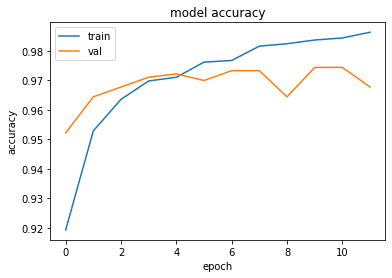

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

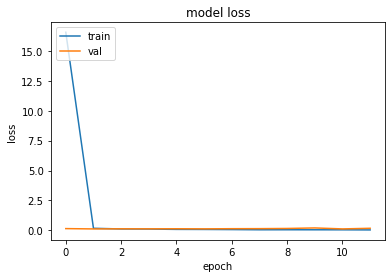

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
# Save neural network structure
model_structure = model.to_json()
f = Path("./model/model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("./model/model_weights.h5")